# Paper Results - Long-term Scenario

This notebooks aims to collect the simulation output and to produce the plots.

In [1]:
%matplotlib inline

import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy import interpolate
import os
from results import *
from os import listdir
from os.path import isfile, join
import re

### Initial Estimate constructors

In [2]:
scenario = "long-term"

files = {
    "Detailed model": "cases/1/scenario_longterm/model_complete/bc_pump/simulation.output.json",
    "Simplified model": "cases/1/scenario_longterm/model_simplified/bc_pump/simulation.output.json",
    #"No biofouling": "cases/1/scenario_longterm/model_simplified/bc_pump/simulation.output.json",
    "No biofouling": "cases/1/scenario_longterm/model_complete/bc_pump/simulationwithoutbiofilm.output.json",
}

dict_dynamic = read_all_data(files)


ix_list = (1,2,4,34)
line_style_list = ('k-','k--','k-.','k:')  
it_list = [0,20-1,40-1,-1]

Reading cases/1/scenario_longterm/model_complete/bc_pump/simulation.output.json
Reading cases/1/scenario_longterm/model_simplified/bc_pump/simulation.output.json
Reading cases/1/scenario_longterm/model_complete/bc_pump/simulationwithoutbiofilm.output.json


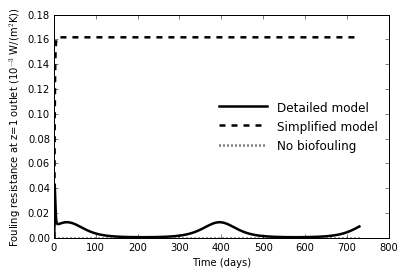

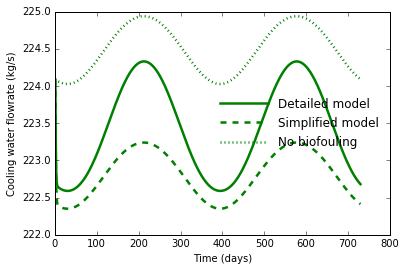

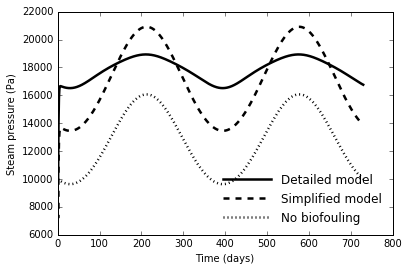

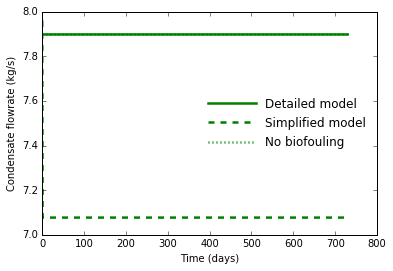

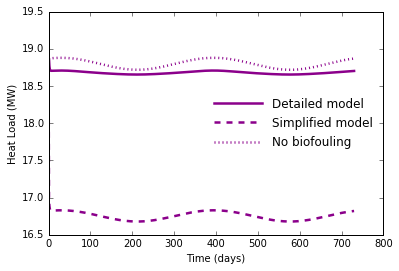

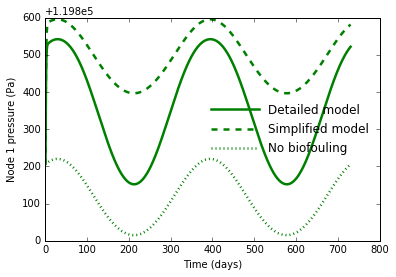

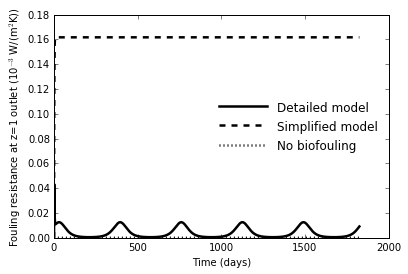

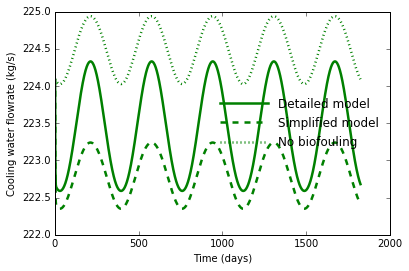

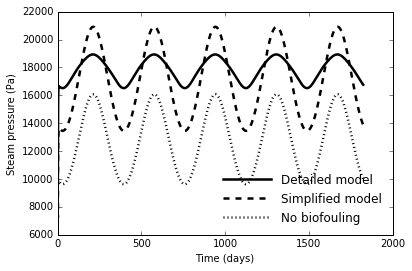

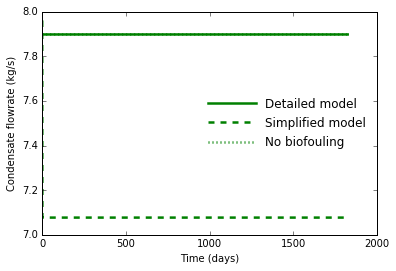

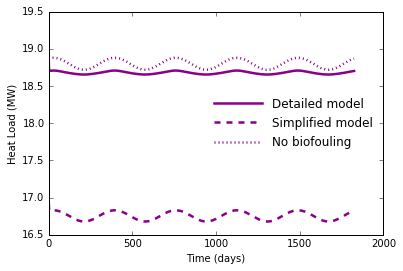

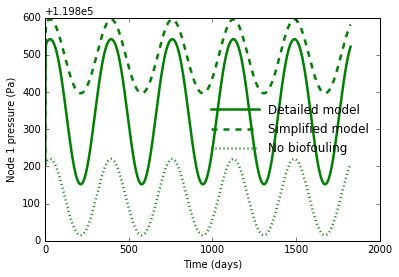

In [3]:
case1 = "Detailed model"
case2 = "Simplified model"
case3 = "No biofouling"
plot_dict = prepare_data_0(dict_dynamic,case1,case2,case3,tlim=2*365)
plot_curves_0(plot_dict, scenario=scenario)
plot_dict = prepare_data_0(dict_dynamic,case1,case2,case3,tlim=5*365)
plot_curves_0(plot_dict, scenario="very-"+scenario)

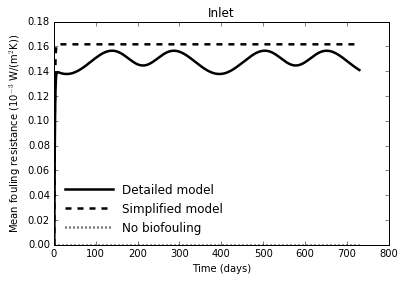

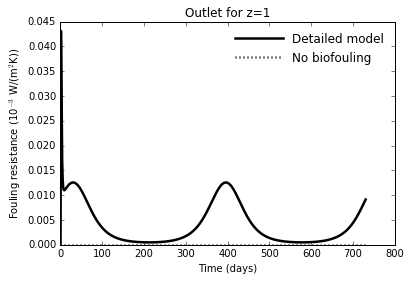

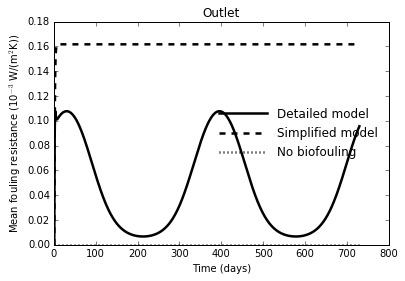

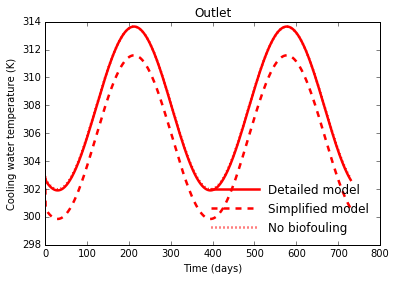

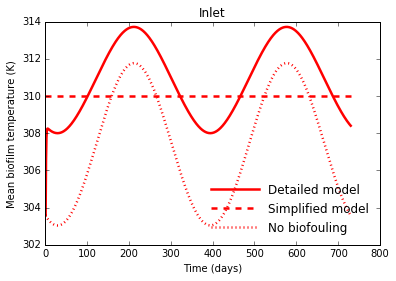

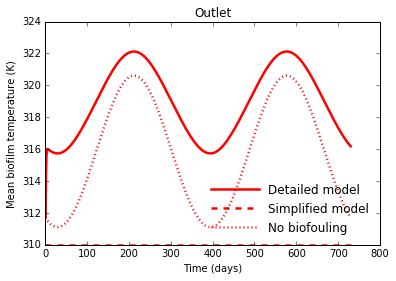

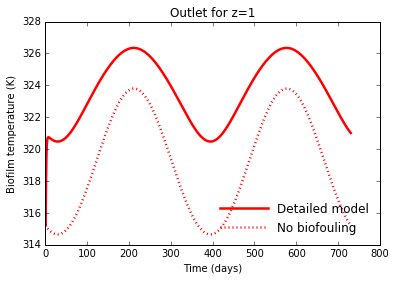

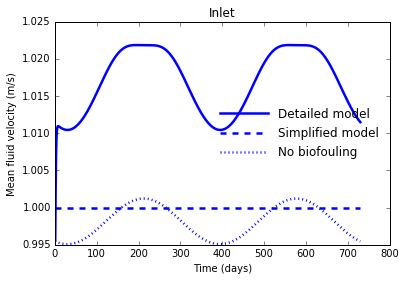

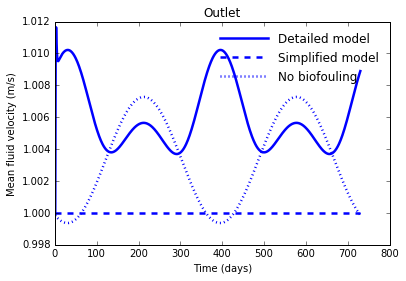

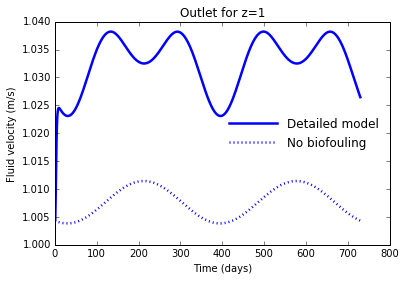

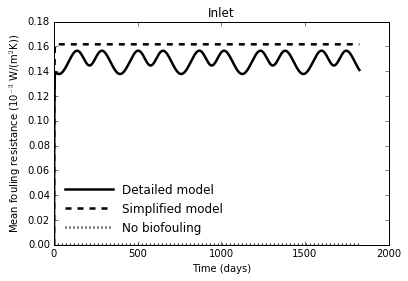

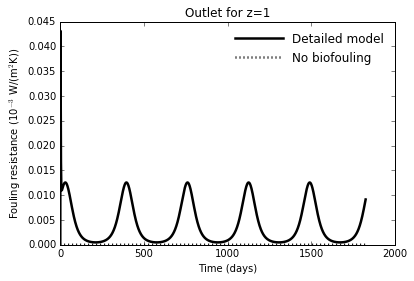

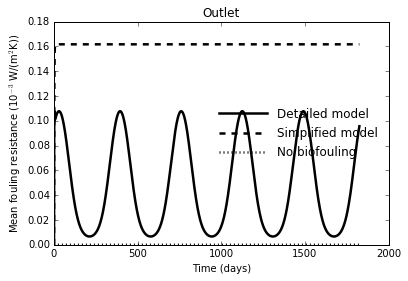

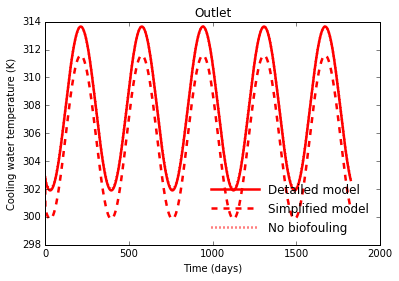

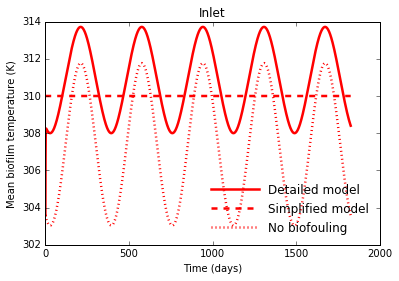

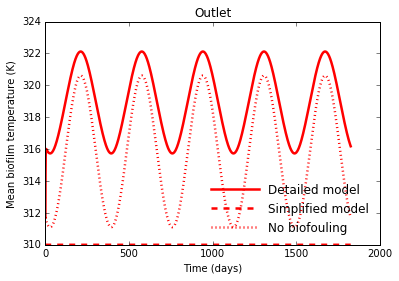

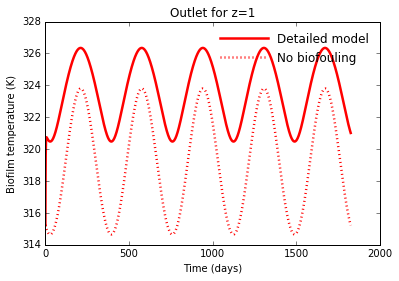

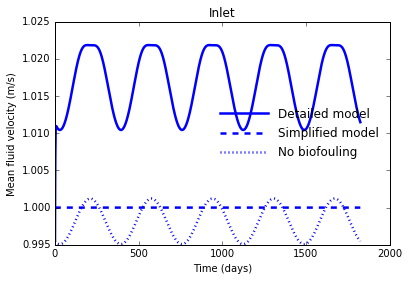

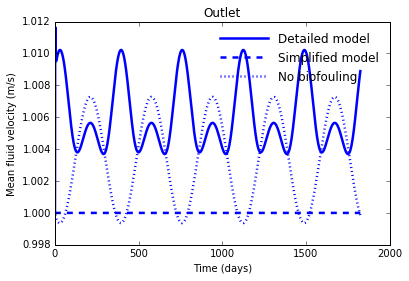

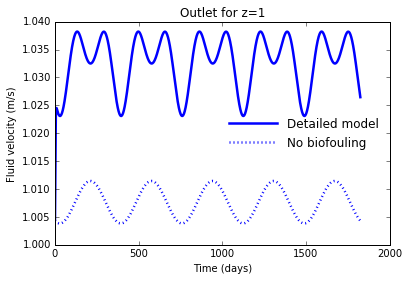

In [4]:
plot_dict = prepare_data_1(dict_dynamic, case1, case2, case3,tlim=2*365)
plot_curves_1(plot_dict, scenario=scenario)
plot_dict = prepare_data_1(dict_dynamic, case1, case2, case3,tlim=5*365)
plot_curves_1(plot_dict, scenario="very-"+scenario)

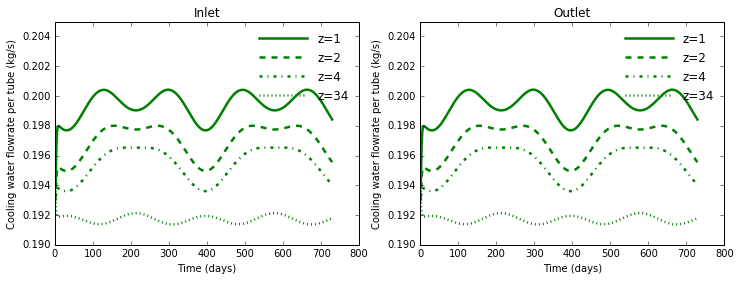

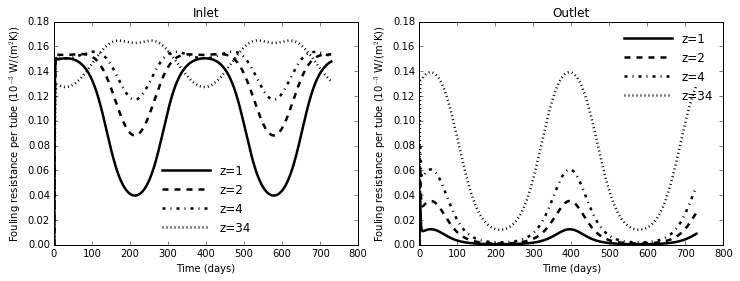

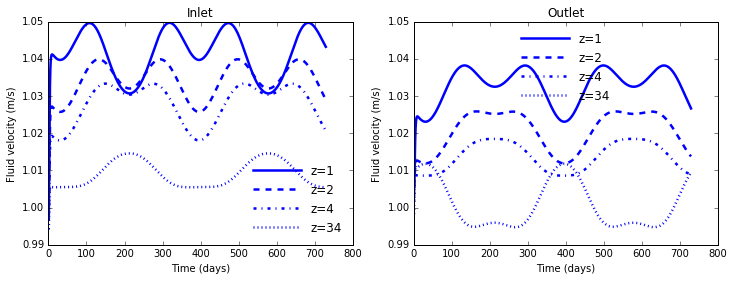

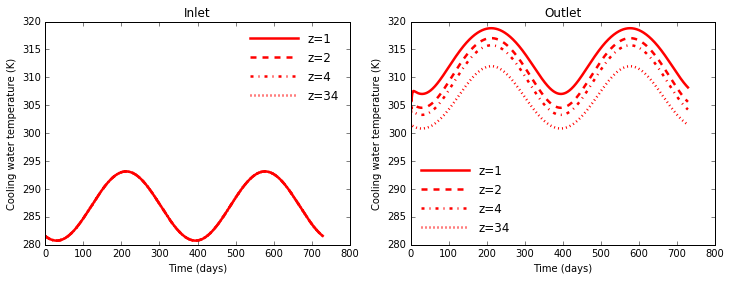

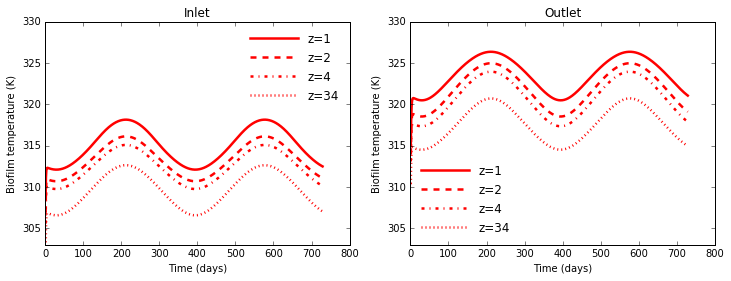

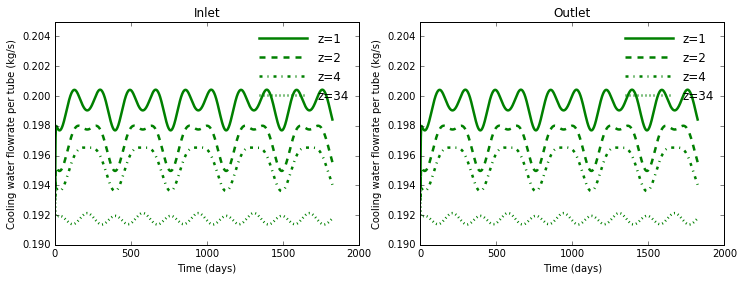

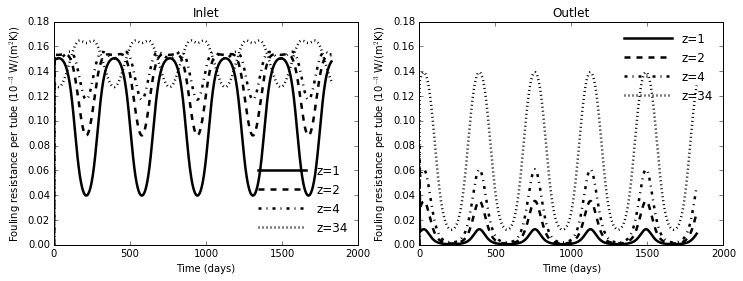

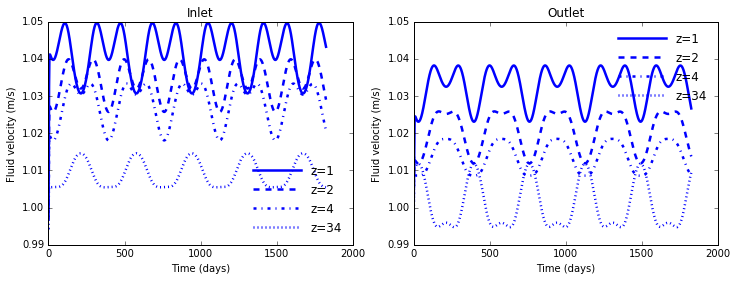

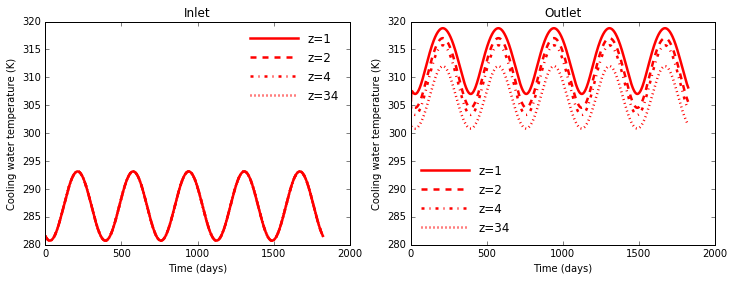

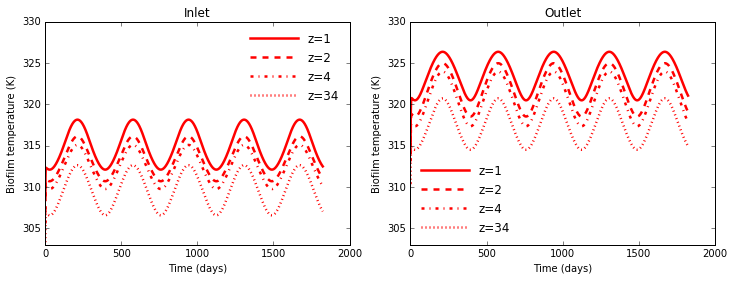

In [5]:
plot_dict = prepare_data_2s(dict_dynamic, case1, tlim=2*365)
plot_curves_2(plot_dict, ix_list, line_style_list, scenario=scenario)
plot_dict = prepare_data_2s(dict_dynamic, case1, tlim=5*365)
plot_curves_2(plot_dict, ix_list, line_style_list, scenario="very-"+scenario)

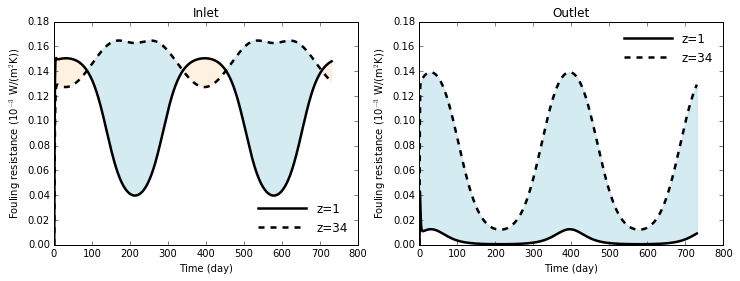

In [6]:
tlim = 2*365
t = dict_dynamic[case1]['condenser.Rfbiofilm']['Times']
z00 = dict_dynamic[case1]['condenser.Rfbiofilm']['Values'][t<=tlim,0,0]*1e3
z01 = dict_dynamic[case1]['condenser.Rfbiofilm']['Values'][t<=tlim,0,-1]*1e3
z10 = dict_dynamic[case1]['condenser.Rfbiofilm']['Values'][t<=tlim,-1,0]*1e3
z11 = dict_dynamic[case1]['condenser.Rfbiofilm']['Values'][t<=tlim,-1,-1]*1e3
t = t[t<=tlim]


fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.plot(t, z00, 'k-', lw=2.5, label="z=1")
ax.plot(t, z01, 'k--', lw=2.5, label="z=34")
plt.fill_between(t,
             z00,
             z01,
             where=z00>=z01,
             color='bisque', alpha='0.5')
plt.fill_between(t,
             z00,
             z01,
             where=z00<z01,
             color='lightblue', alpha='0.5')
ax.set_xlabel('Time (day)')
ax.set_ylabel('Fouling resistance (10$^{-3}$ W/(m$^2$K))')
ax.set_ylim(0,0.18)
leg = plt.legend(frameon=False,loc='lower right',ncol=1,handlelength=4, numpoints=1)
ax.set_title('Inlet')

ax = fig.add_subplot(122)
ax.plot(t, z10, 'k-', lw=2.5, label="z=1")
ax.plot(t, z11, 'k--', lw=2.5, label="z=34")
plt.fill_between(t,
             z10,
             z11,
             where=z10>=z11,
             color='bisque', alpha='0.5')
plt.fill_between(t,
             z10,
             z11,
             where=z10<z11,
             color='lightblue', alpha='0.5')


ax.set_xlabel('Time (day)')
ax.set_ylabel('Fouling resistance (10$^{-3}$ W/(m$^2$K))')
ax.set_ylim(0,0.18)
leg = plt.legend(frameon=False,loc='upper right',ncol=1,handlelength=4, numpoints=1)
ax.set_title('Outlet')
plt.savefig(os.path.join('./pdfs/','{}_locus.pdf'.format(scenario)),dpi=300)
plt.show()

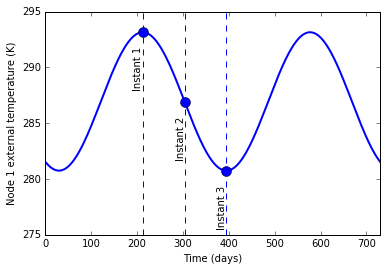

/Users/jaimenms/PycharmProjects/celldeposit-condenser/.venv/lib/python3.6/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/jaimenms/PycharmProjects/celldeposit-condenser/.venv/lib/python3.6/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


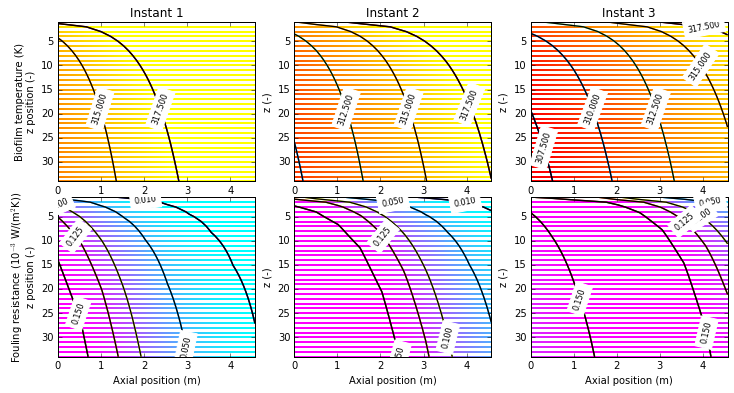

In [7]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

tlim = 2*365
tA = dict_dynamic[case1]['condenser.Tbf']['Times']
z0A = dict_dynamic[case1]['condenser.L']['Values'][0] * np.asarray(dict_dynamic[case1]['condenser.Tbf']['Domains'][0])
z1A = np.asarray(dict_dynamic[case1]['condenser.Tbf']['Domains'][1])
Z0A, Z1A = np.meshgrid(z0A, z1A)
tB = dict_dynamic[case1]['condenser.Rfbiofilm']['Times']
z0B = dict_dynamic[case1]['condenser.L']['Values'][0] * np.asarray(dict_dynamic[case1]['condenser.Rfbiofilm']['Domains'][0])
z1B = np.asarray(dict_dynamic[case1]['condenser.Rfbiofilm']['Domains'][1])
Z0B, Z1B = np.meshgrid(z0B, z1B)

#ix_list = np.where(np.isin(tA, (np.round(121+365/4),np.round(121+2*365/4),np.round(121+3*365/4),np.round(121+4*365/4),)))[0]
ix_list = np.where(np.isin(tA, (np.round(121+365/4),np.round(121+2*365/4),np.round(121+3*365/4),)))[0]

tnode = dict_dynamic[case1]['node_A.T']['Times']
Tnode = dict_dynamic[case1]['node_A.T']['Values']


fig = plt.figure()
plt.subplots_adjust(hspace=0.1)

ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1)
ax1.plot(tnode[tnode<=tlim],Tnode[tnode<=tlim], "b-", lw=2.0)
ax1.plot(tnode[ix_list], Tnode[ix_list], "bo", lw=2.0, markersize=10)
ax1.set_ylim((275,295))
ax1.set_ylabel('Node 1 external temperature (K)')
ax1.set_xlabel('Time (days)')
ax1.margins(0) 

i=0
for ix in ix_list:

    ax1.axvline(x=tnode[ix], color="blue",linestyle='--')
    ax1.text(tnode[ix]-20,Tnode[ix]-2,'Instant {}'.format(i+1),rotation=90)
    i+=1

plt.savefig(os.path.join('.','{}_instants.pdf'.format(scenario)),dpi=300)
plt.show()



# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.0f' % self.__float__()
        else:
            return '%.1f' % self.__float__()

    
fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.1)


i=0
for ix in ix_list:

    
    ax2 = plt.subplot2grid((2, 3), (0, i))
    
    zmax=317.5
    zmin=307.5

    j=0
    for yaux in z1A:
        
        xj = z0A
        zj = dict_dynamic[case1]['condenser.Tbf']['Values'][ix,:,j]
        f = interpolate.interp1d(xj, zj)
        xj2 = np.linspace(np.min(xj),np.max(xj),100)
        zj2 = f(xj2)
        
        yj2 = 0*xj2 + yaux
        points = np.array([xj2, yj2]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap=plt.get_cmap('autumn'),
                        norm=plt.Normalize(zmin, zmax))
        lc.set_array(zj2)
        lc.set_linewidth(2)
        ax2.add_collection(lc)
        j +=1
        
    
    xA = np.transpose(dict_dynamic[case1]['condenser.Tbf']['Values'][ix,:,:])
    CS = ax2.contour(Z0A, Z1A, xA, (307.5, 310, 312.5,315.0,317.5), linewidths=1.5)
    CS.levels = [nf(val) for val in CS.levels]

    ax2.contour(CS, linewidths=1.3, colors='k')
    clabels = ax2.clabel(CS, inline_spacing=0, inline=False, fontsize=8, colors='k')
    [txt.set_backgroundcolor('white') for txt in clabels]
    ax2.set_title('Instant {}'.format(i+1))
    #ax2.set_xlabel('Axial position (m)')
    if i == 0:
        ax2.set_ylabel('Biofilm temperature (K)\nz position (-)')
    else:
        ax2.set_ylabel('z (-)')
    ax2.set_ylim((1,34))
    ax2.invert_yaxis()

    
    ax3 = plt.subplot2grid((2, 3), (1, i))
    
    zmax=0.15
    zmin=0.01
    
    j=0
    for yaux in z1A:
        
        xj = z0A
        zj = dict_dynamic[case1]['condenser.Rfbiofilm']['Values'][ix,:,j]*1e3
        f = interpolate.interp1d(xj, zj)
        xj2 = np.linspace(np.min(xj),np.max(xj),100)
        zj2 = f(xj2)
        
        yj2 = 0*xj2 + yaux
        points = np.array([xj2, yj2]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap=plt.get_cmap('cool'),
                        norm=plt.Normalize(zmin, zmax))
        lc.set_array(zj2)
        lc.set_linewidth(2)
        ax3.add_collection(lc)
        j +=1
    
    xB = np.transpose(dict_dynamic[case1]['condenser.Rfbiofilm']['Values'][ix,:,:])*1e3
    CS = ax3.contour(Z0B, Z1B, xB, (0.01, 0.05, 0.10, 0.125, 0.150), linewidths=1.5)
    ax3.contour(CS, linewidths=1.3, colors='k')
    clabels = ax3.clabel(CS, inline_spacing=0, inline=False, fontsize=8, colors='k')
    [txt.set_backgroundcolor('white') for txt in clabels]
    ax3.set_xlabel('Axial position (m)')
    if i == 0:
        ax3.set_ylabel('Fouling resistance (10$^{-3}$ W/(m$^2$K))\nz position (-)')
    else:
        ax3.set_ylabel('z (-)')
    ax3.set_ylim((1,34))
    ax3.invert_yaxis()

    i+=1

plt.savefig(os.path.join('./pdfs/','{}_tubes.pdf'.format(scenario)),dpi=300)
plt.show()

In [8]:
scenario_ = scenario

mypath = "./pdfs/"
file_kind = "pdf"
onlyfiles = [f[:-4] for f in listdir(mypath) if (isfile(join(mypath, f)) and f[-len(file_kind):] == file_kind and re.match(scenario_,f))]

for name in onlyfiles:
    name2 = name.replace("-","_").replace(".","_")
    txt = r"\begin{figure} \centering \includegraphics[scale=0.5]{{"+name+r"}.pdf} \caption{"+name2+r"} \label{"+name2+r"} \end{figure}"
    print("%s"%txt)
    print()

\begin{figure} \centering \includegraphics[scale=0.5]{{long-term_tubes}.pdf} \caption{long_term_tubes} \label{long_term_tubes} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{long-term_curve1_condenser.Rfbiofilmoutlet}.pdf} \caption{long_term_curve1_condenser_Rfbiofilmoutlet} \label{long_term_curve1_condenser_Rfbiofilmoutlet} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{long-term_locus}.pdf} \caption{long_term_locus} \label{long_term_locus} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{long-term_curve2_condenser.T}.pdf} \caption{long_term_curve2_condenser_T} \label{long_term_curve2_condenser_T} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{long-term_curve2_condenser.Rfbiofilm}.pdf} \caption{long_term_curve2_condenser_Rfbiofilm} \label{long_term_curve2_condenser_Rfbiofilm} \end{figure}

\begin{figure} \centering \includegraphics[scale=0.5]{{long-term_curve1_condenser.Rfbiofilm}.pdf} \caption{long_

## Comparing results for different years

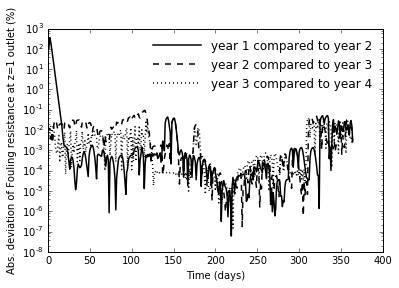

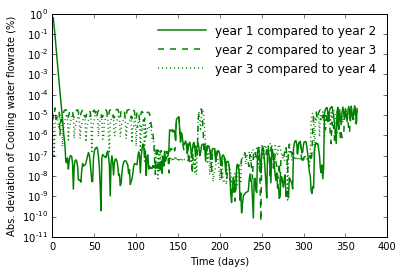

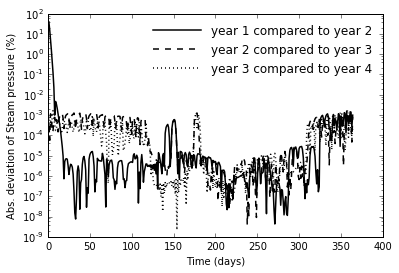

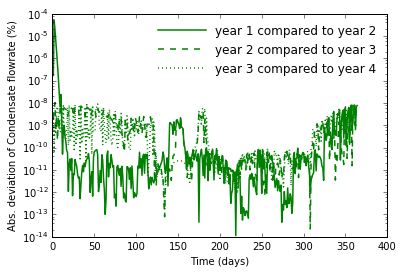

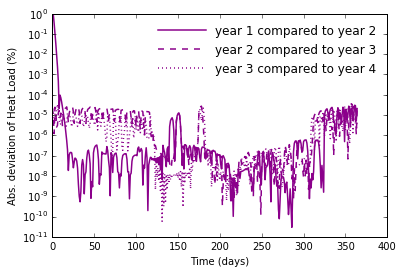

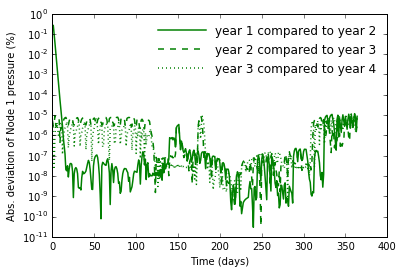

In [9]:
from scipy import interpolate
import re

plot_dict = prepare_data_0(dict_dynamic,case1,case2,case3,tlim=5*365)

i = 0
for plot_dict_i in plot_dict:
    t1 = plot_dict_i['t1']
    t1_y1 = t1[(t1>=0*365) & (t1<1*365)]-0*365
    t1_y2 = t1[(t1>=1*365) & (t1<2*365)]-1*365
    t1_y3 = t1[(t1>=2*365) & (t1<3*365)]-2*365
    t1_y4 = t1[(t1>=3*365) & (t1<4*365)]-3*365
    t1_y5 = t1[(t1>=4*365) & (t1<5*365)]-4*365
    x1 = plot_dict_i['x1']
    x1_y1 = x1[(t1>=0*365) & (t1<1*365)]
    x1_y2 = x1[(t1>=1*365) & (t1<2*365)]
    x1_y3 = x1[(t1>=2*365) & (t1<3*365)]
    x1_y4 = x1[(t1>=3*365) & (t1<4*365)]
    x1_y5 = x1[(t1>=4*365) & (t1<5*365)]
    
    f_y2 = interpolate.interp1d(t1_y2, x1_y2)
    f_y3 = interpolate.interp1d(t1_y3, x1_y3)
    f_y4 = interpolate.interp1d(t1_y4, x1_y4)
    f_y5 = interpolate.interp1d(t1_y5, x1_y5)


    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.semilogy(t1_y1, abs((x1_y1-f_y2(t1_y1))/f_y2(t1_y1))*100, 'k-', lw=1.5, label="year 1 compared to year 2")
    ax.semilogy(t1_y2, abs((x1_y2-f_y3(t1_y2))/f_y3(t1_y2))*100, 'k--', lw=1.5, label="year 2 compared to year 3")
    ax.semilogy(t1_y3, abs((x1_y3-f_y4(t1_y3))/f_y4(t1_y3))*100, 'k:', lw=1.5, label="year 3 compared to year 4")

    for ax in plt.gcf().axes:
        for line in ax.get_lines():
            line.set_color(plot_dict_i['color'])

    ax.set_xlabel('Time (days)')
    ax.set_ylabel(re.sub(r'\(.*\)', '(%)', "Abs. deviation of " + plot_dict_i['y_label']))
    ax.autoscale(enable=True, axis='both', tight=None)

    plt.legend(frameon=False, loc=plot_dict_i['leg_position'], ncol=1, handlelength=4, numpoints=1)
    plt.savefig(os.path.join('./pdfs/', '{}_deviation_{}.pdf'.format(scenario, plot_dict_i["variable"])), dpi=300)

    plt.show()
    i += 1

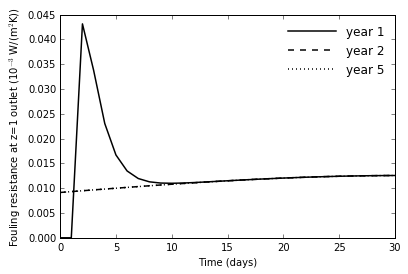

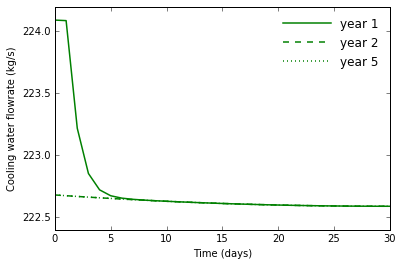

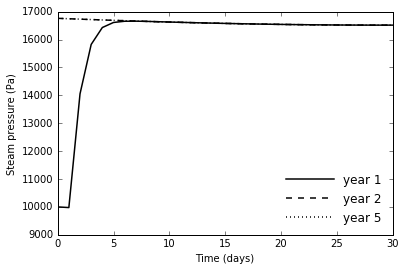

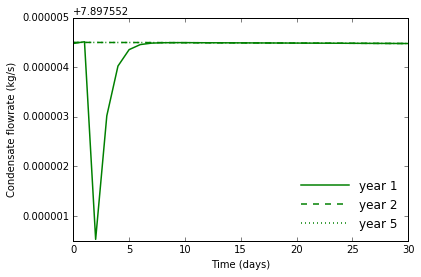

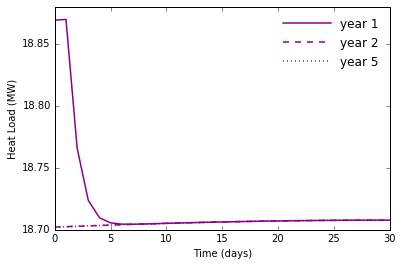

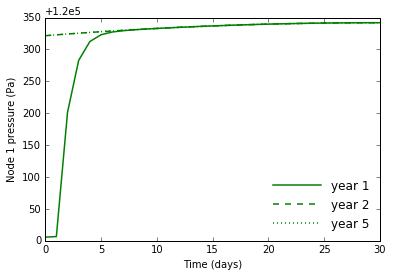

In [10]:
i = 0
for plot_dict_i in plot_dict:
    t1 = plot_dict_i['t1']
    t1_y1 = t1[(t1>=0*365) & (t1<1*365)]-0*365
    t1_y2 = t1[(t1>=1*365) & (t1<2*365)]-1*365
    t1_y3 = t1[(t1>=2*365) & (t1<3*365)]-2*365
    t1_y4 = t1[(t1>=3*365) & (t1<4*365)]-3*365
    t1_y5 = t1[(t1>=4*365) & (t1<5*365)]-4*365
    x1 = plot_dict_i['x1']
    x1_y1 = x1[(t1>=0*365) & (t1<1*365)]
    x1_y2 = x1[(t1>=1*365) & (t1<2*365)]
    x1_y3 = x1[(t1>=2*365) & (t1<3*365)]
    x1_y4 = x1[(t1>=3*365) & (t1<4*365)]
    x1_y5 = x1[(t1>=4*365) & (t1<5*365)]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t1_y1[t1_y1<=30], x1_y1[t1_y1<=30], 'k-', lw=1.5, label="year 1")
    ax.plot(t1_y2[t1_y2<=30], x1_y2[t1_y2<=30], 'k--', lw=1.5, label="year 2")
    ax.plot(t1_y5[t1_y5<=30], x1_y5[t1_y5<=30], 'k:', lw=1.5, label="year 5")
    
    for ax in plt.gcf().axes:
        for line in ax.get_lines():
            line.set_color(plot_dict_i['color'])

    ax.set_xlabel('Time (days)')
    ax.set_ylabel(plot_dict_i['y_label'])
    ax.autoscale(enable=True, axis='both', tight=None)

    plt.legend(frameon=False, loc=plot_dict_i['leg_position'], ncol=1, handlelength=4, numpoints=1)
    plt.savefig(os.path.join('./pdfs/', '{}_deviation_{}.pdf'.format(scenario, plot_dict_i["variable"])), dpi=300)

    plt.show()
    i += 1